In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance




In [3]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [32]:
pd.set_option('display.float_format', '{:,.2f}'.format)

print(df.describe())

              step        amount  oldbalanceOrg  newbalanceOrig  \
count 6,362,620.00  6,362,620.00   6,362,620.00    6,362,620.00   
mean        243.40    179,861.90     833,883.10      855,113.67   
std         142.33    603,858.23   2,888,242.67    2,924,048.50   
min           1.00          0.00           0.00            0.00   
25%         156.00     13,389.57           0.00            0.00   
50%         239.00     74,871.94      14,208.00            0.00   
75%         335.00    208,721.48     107,315.18      144,258.41   
max         743.00 92,445,516.64  59,585,040.37   49,585,040.37   

       oldbalanceDest  newbalanceDest      isFraud  isFlaggedFraud  
count    6,362,620.00    6,362,620.00 6,362,620.00    6,362,620.00  
mean     1,100,701.67    1,224,996.40         0.00            0.00  
std      3,399,180.11    3,674,128.94         0.04            0.00  
min              0.00            0.00         0.00            0.00  
25%              0.00            0.00         0.00 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

C:\Users\minh1\AppData\Local\Temp\ipykernel_2408\3269295892.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=df, palette='pastel')


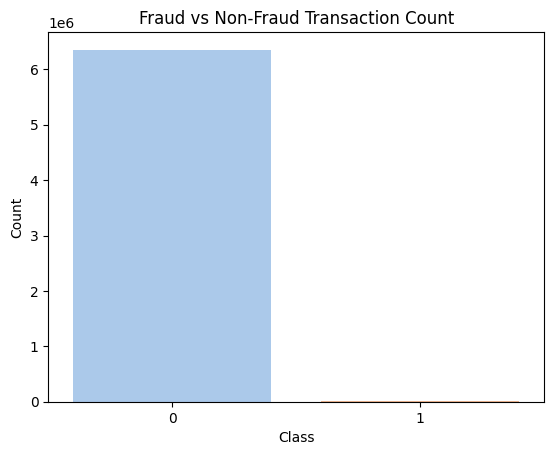

In [7]:
sns.countplot(x='isFraud', data=df, palette='pastel')
plt.title("Fraud vs Non-Fraud Transaction Count")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [8]:
df['isFraud'].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

C:\Users\minh1\AppData\Local\Temp\ipykernel_5204\4145859814.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=fraud_df, palette='Set1')


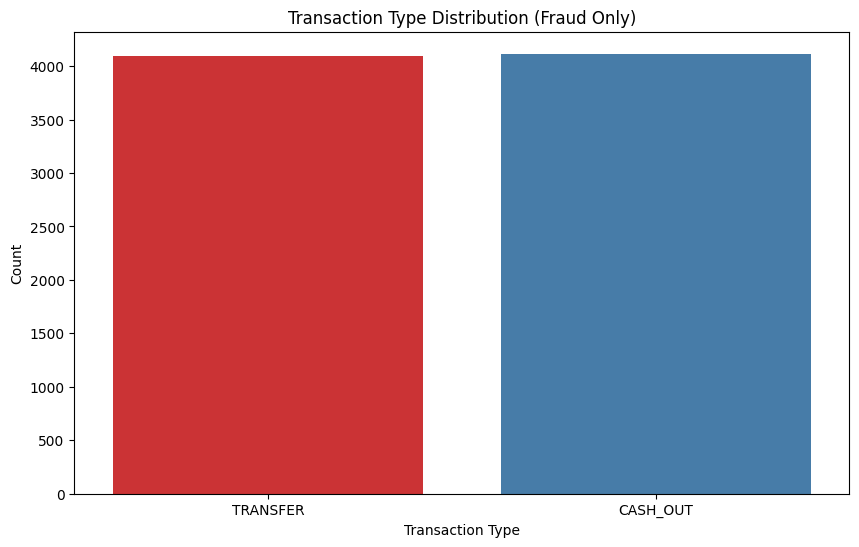

In [14]:
fraud_df = df[df['isFraud'] == 1]

plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=fraud_df, palette='Set1')
plt.title("Transaction Type Distribution (Fraud Only)")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

In [10]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,"9,839.64",C1231006815,"170,136.00","160,296.36",M1979787155,0.00,0.00,0,0
1,1,3,"1,864.28",C1666544295,"21,249.00","19,384.72",M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0
4,1,3,"11,668.14",C2048537720,"41,554.00","29,885.86",M1230701703,0.00,0.00,0,0


array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'type'}>,
        <Axes: title={'center': 'amount'}>],
       [<Axes: title={'center': 'oldbalanceOrg'}>,
        <Axes: title={'center': 'newbalanceOrig'}>,
        <Axes: title={'center': 'oldbalanceDest'}>],
       [<Axes: title={'center': 'newbalanceDest'}>,
        <Axes: title={'center': 'isFraud'}>,
        <Axes: title={'center': 'isFlaggedFraud'}>]], dtype=object)

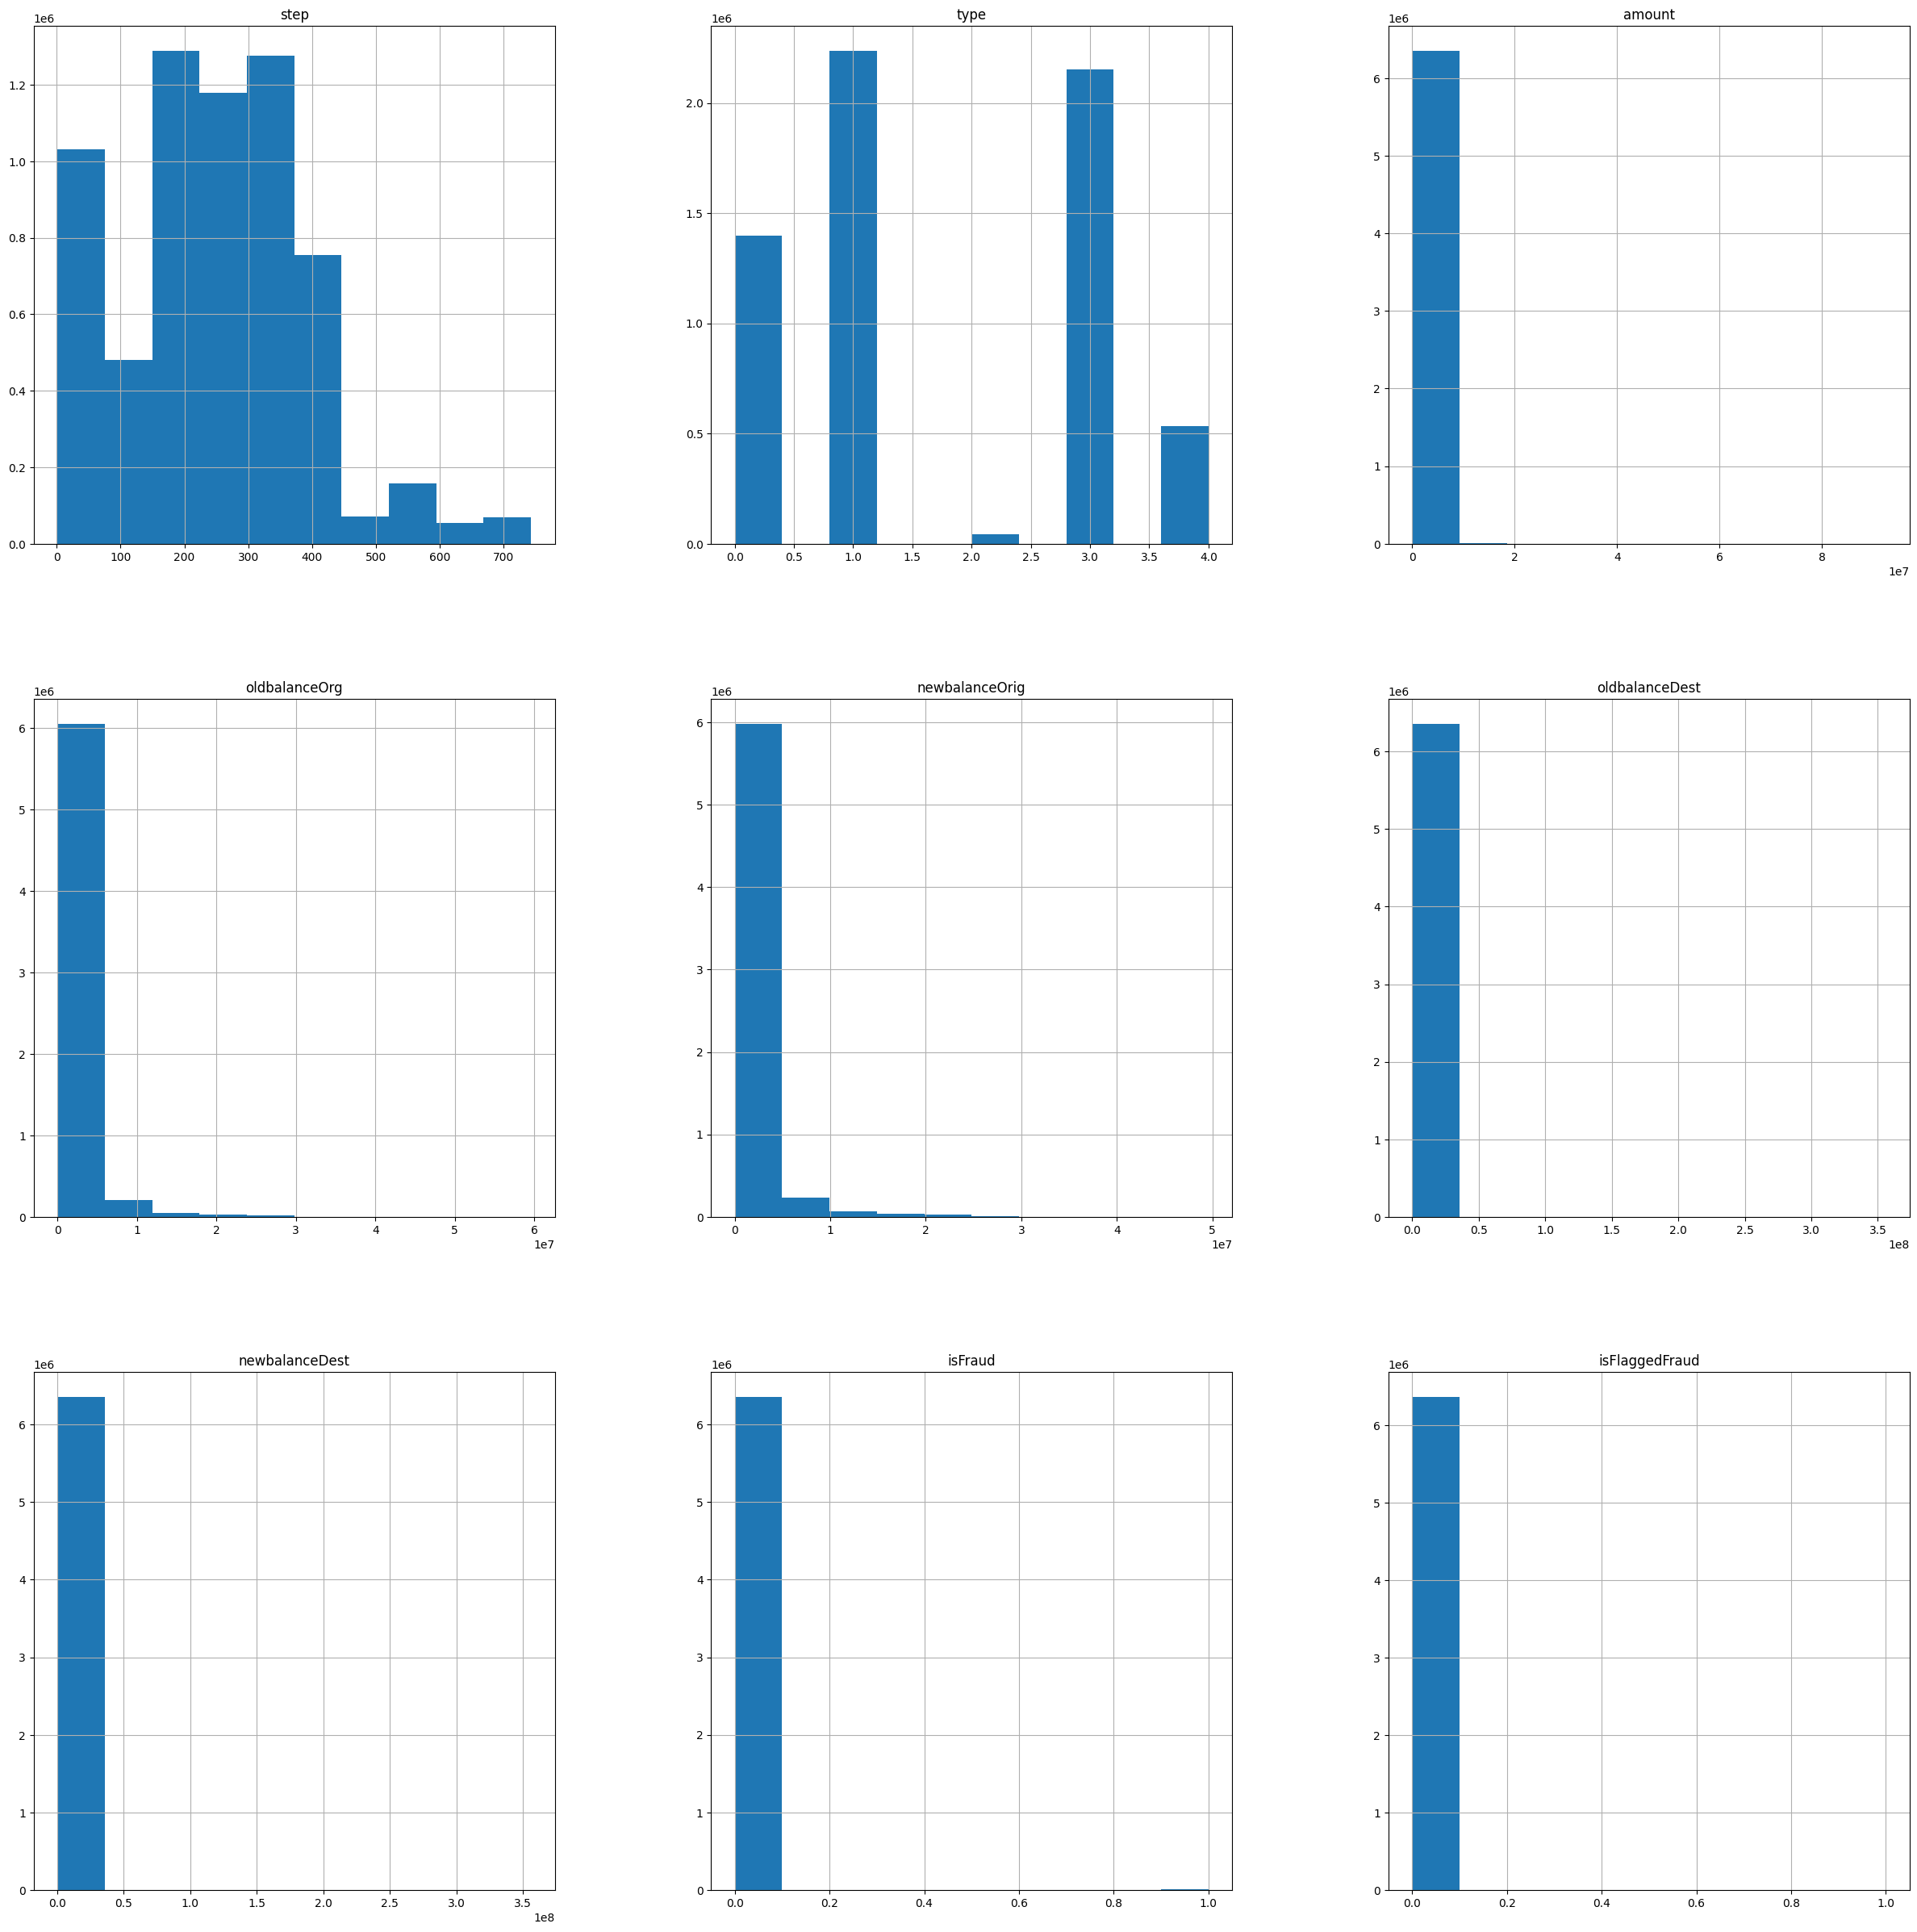

In [11]:
df.hist(figsize=(30, 30), bins=10)

<Axes: >

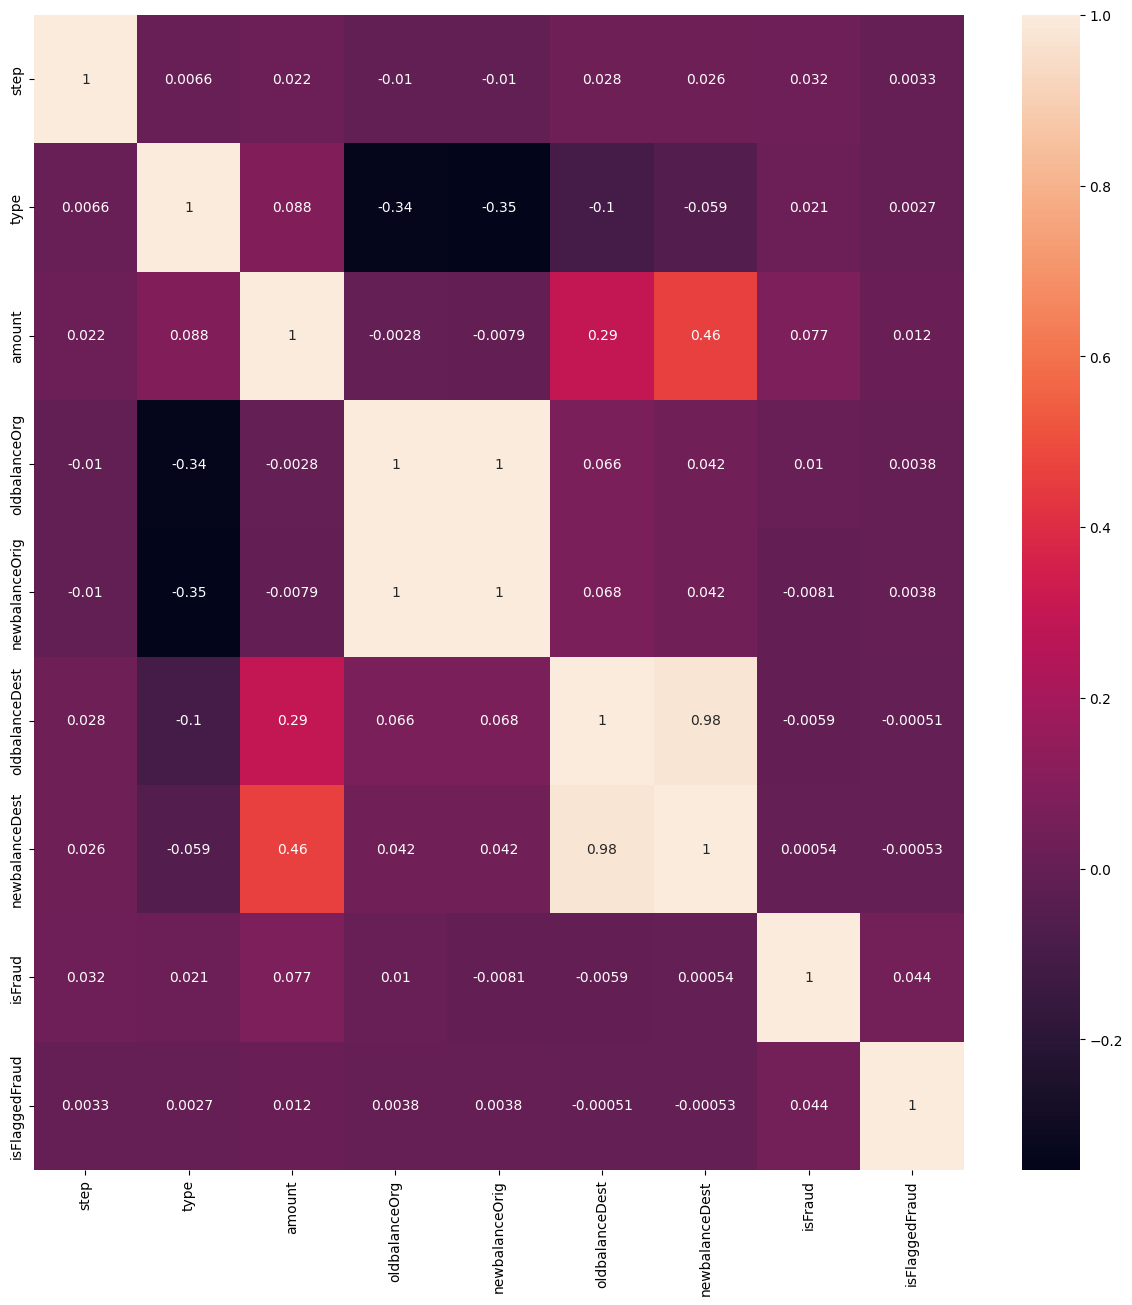

In [5]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr=numeric_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr ,annot=True)

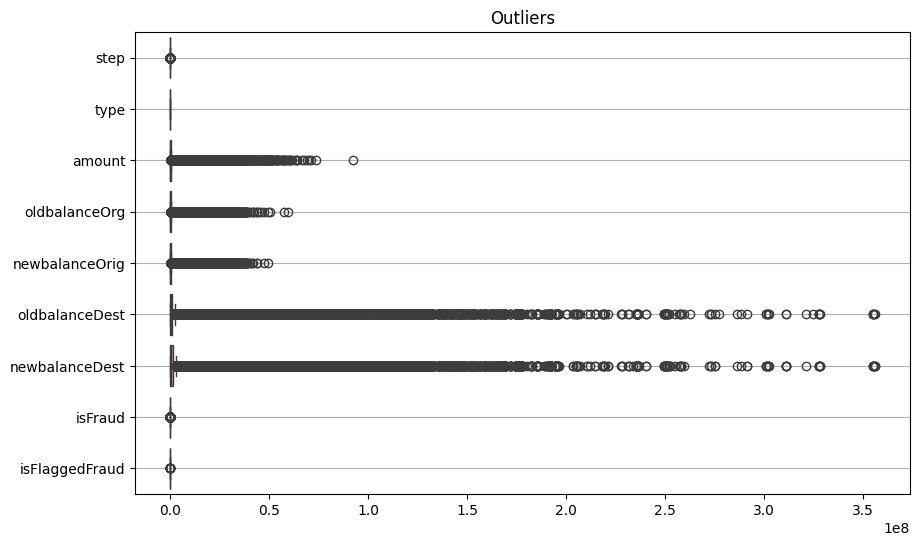

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h') # horizontal
plt.title('Outliers')
plt.grid(axis='y')
plt.show()

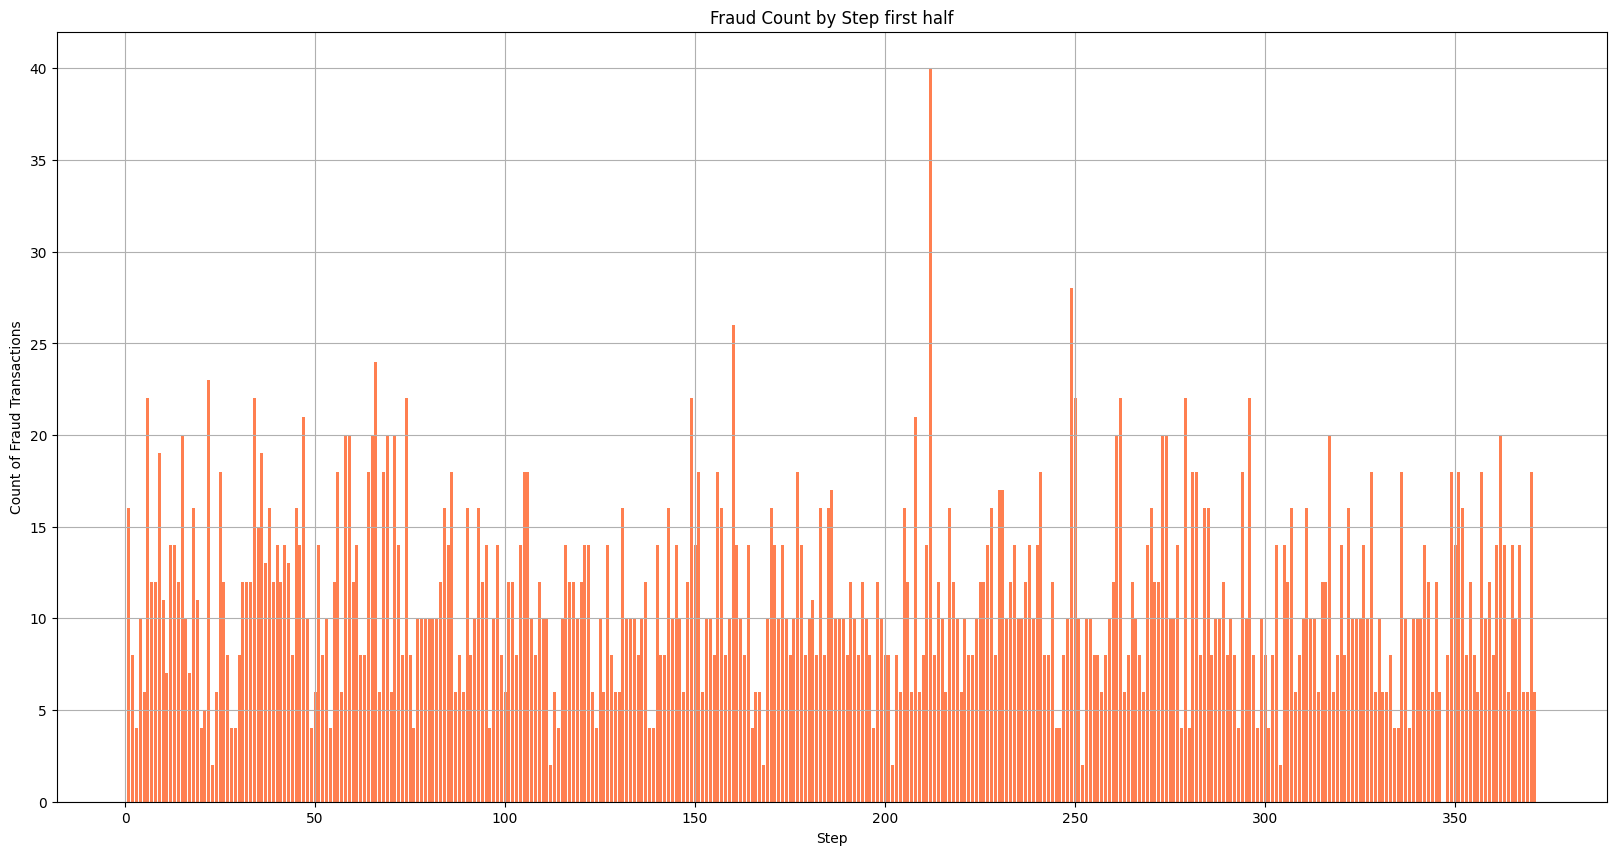

In [10]:
fraud_count_per_step = df[df['isFraud'] == 1].groupby('step').size()

half_index = len(fraud_count_per_step) // 2


# Plot the count of frauds for each step
plt.figure(figsize=(20, 10))
plt.bar(fraud_count_per_step.index[:half_index], fraud_count_per_step.values[:half_index], color='coral')
plt.xlabel('Step')
plt.ylabel('Count of Fraud Transactions')
plt.title('Fraud Count by Step first half')
plt.grid(True)
plt.show()

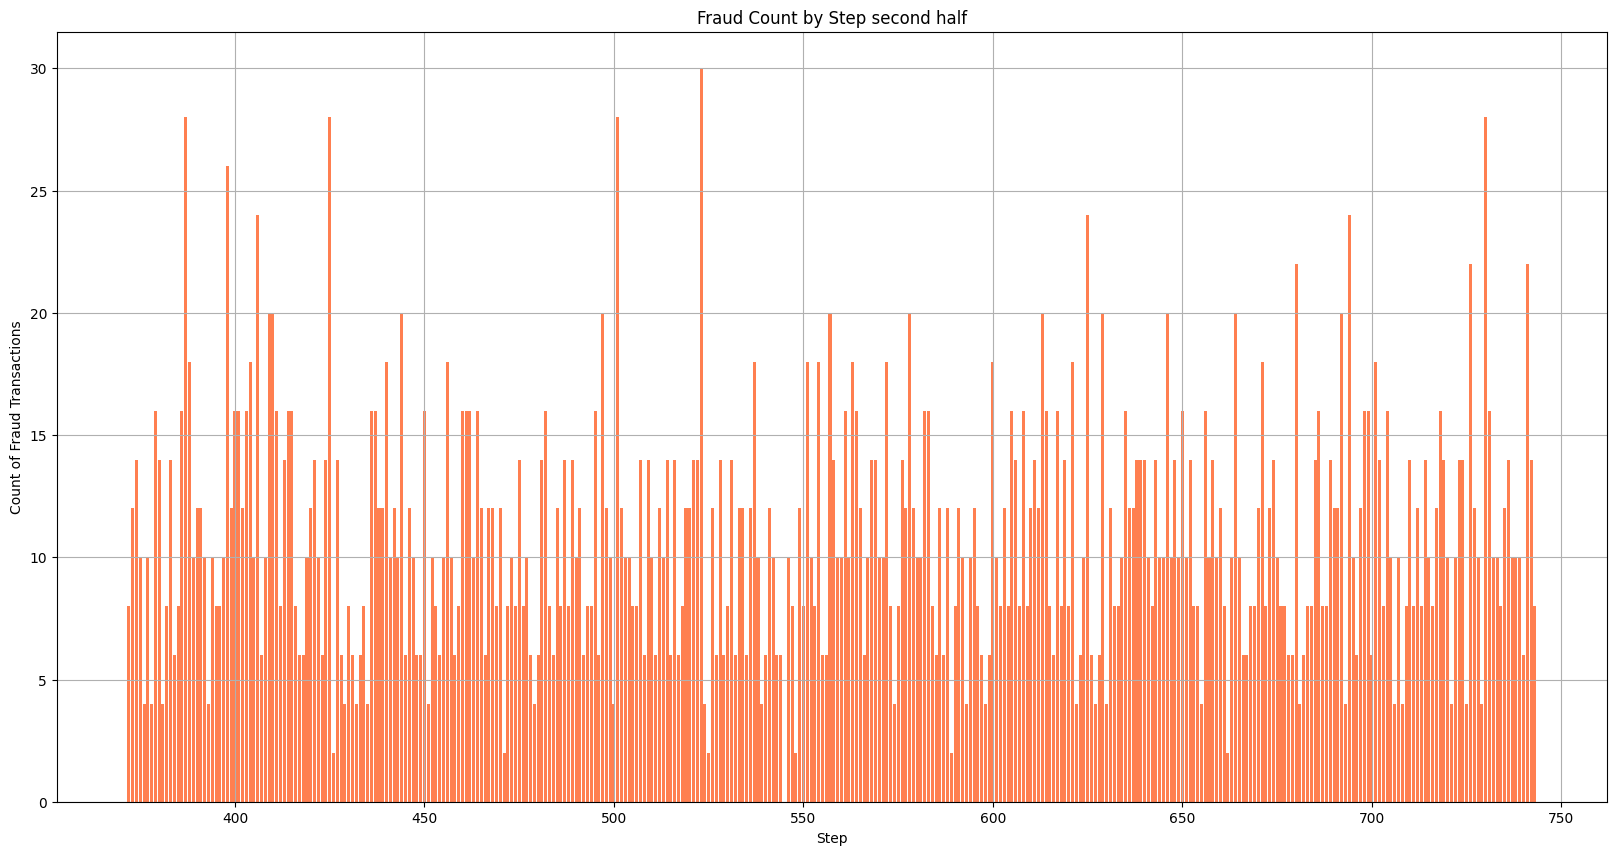

In [45]:
plt.figure(figsize=(20, 10))
plt.bar(fraud_count_per_step.index[half_index:], fraud_count_per_step.values[half_index:], color='coral')
plt.xlabel('Step')
plt.ylabel('Count of Fraud Transactions')
plt.title('Fraud Count by Step second half')
plt.grid(True)
plt.show()

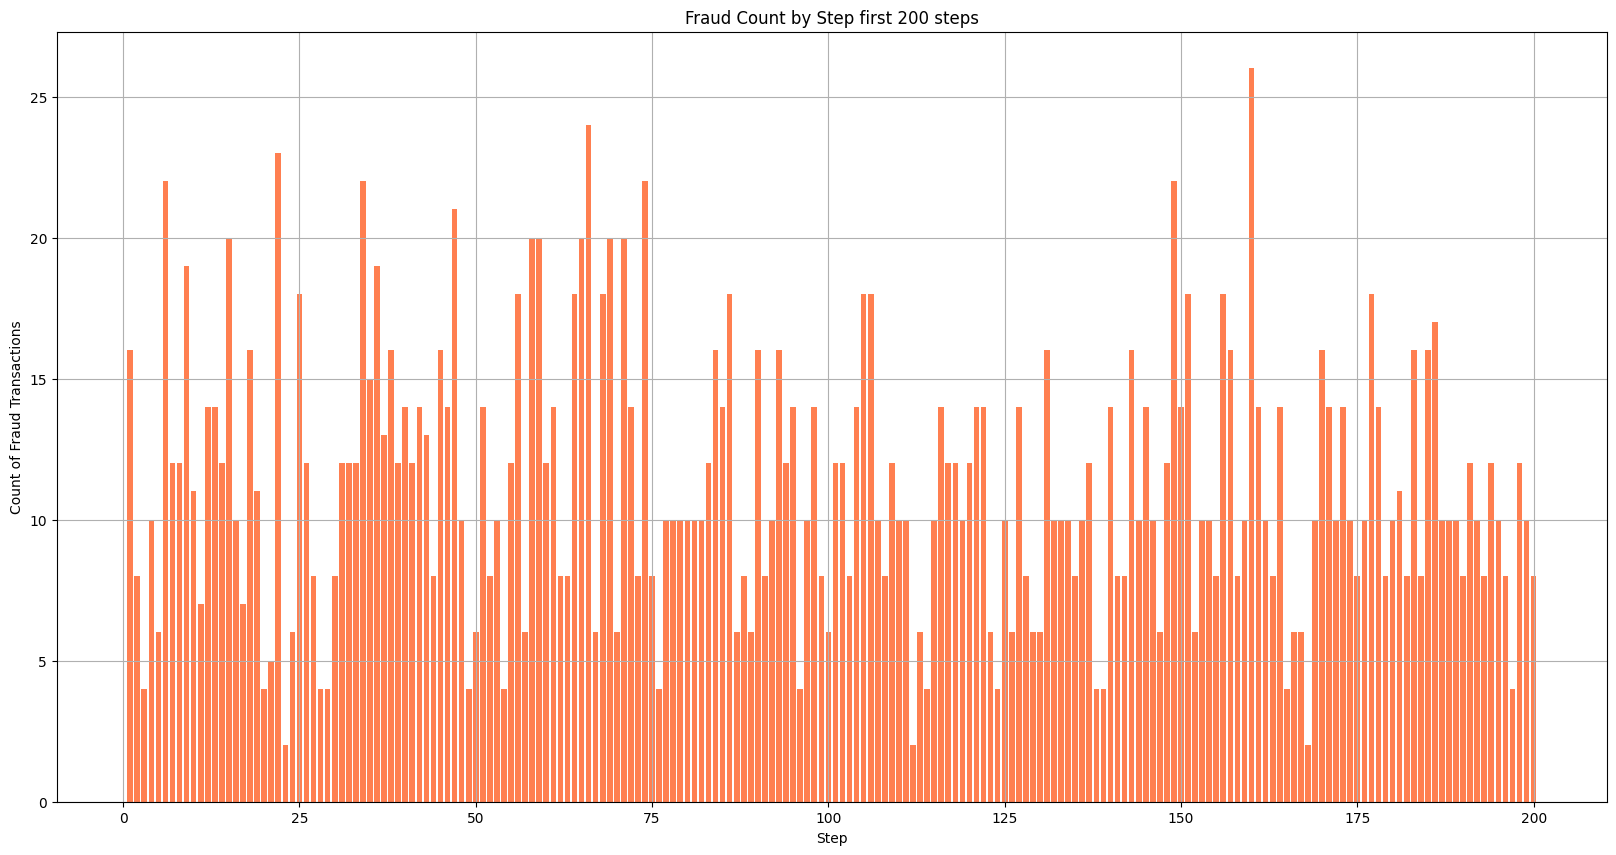

In [55]:
plt.figure(figsize=(20, 10))
plt.bar(fraud_count_per_step.index[:200], fraud_count_per_step.values[:200], color='coral')
plt.xlabel('Step')
plt.ylabel('Count of Fraud Transactions')
plt.title('Fraud Count by Step first 200 steps')
plt.grid(True)
plt.show()

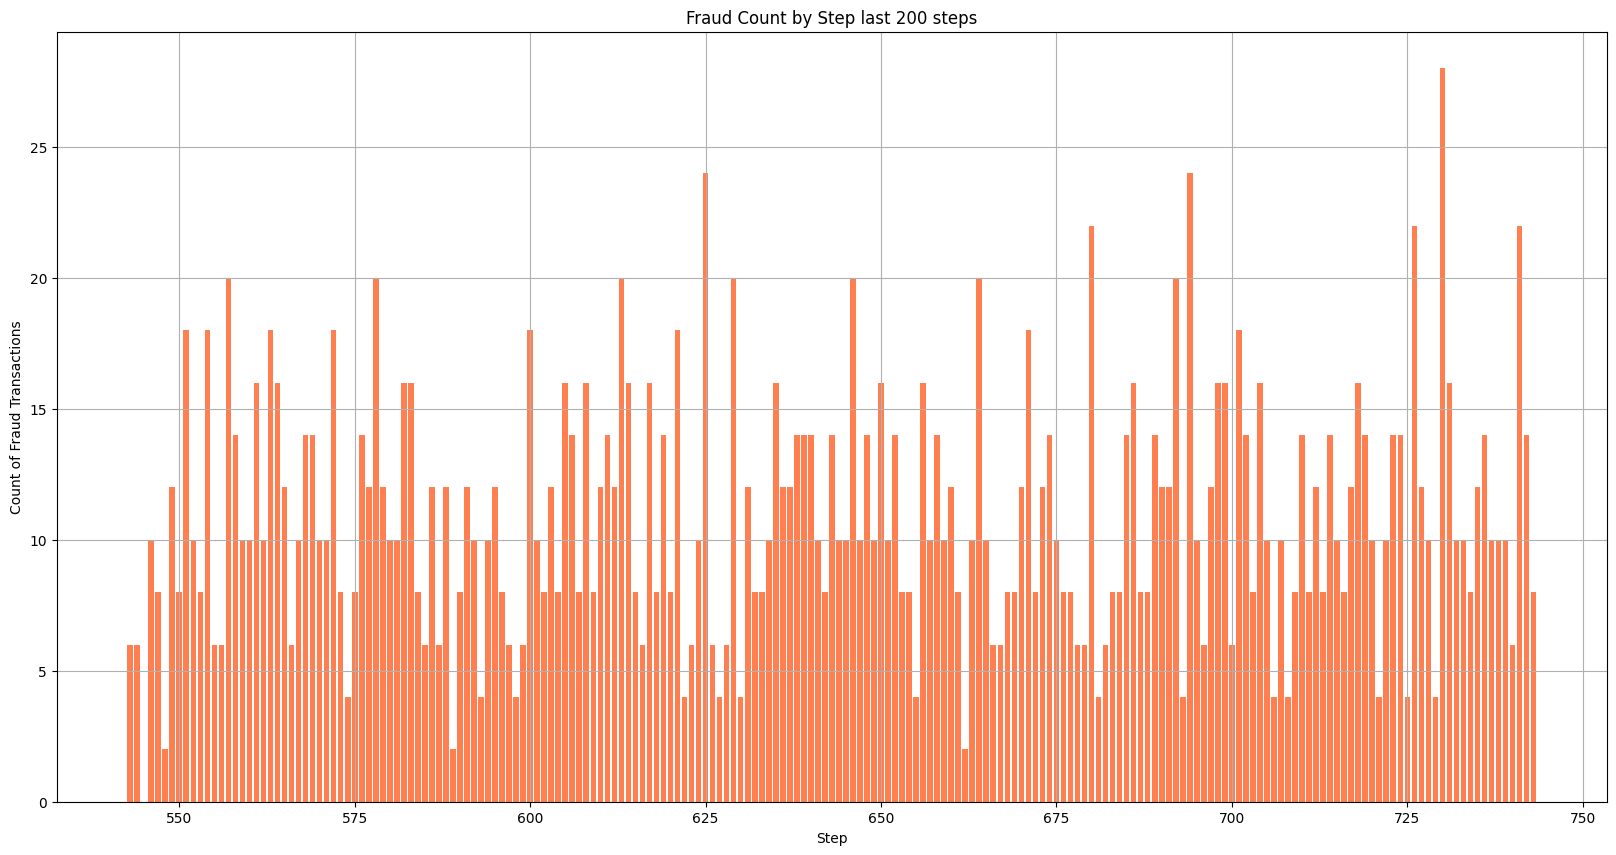

In [56]:
plt.figure(figsize=(20, 10))
plt.bar(fraud_count_per_step.index[-200:], fraud_count_per_step.values[-200:], color='coral')
plt.xlabel('Step')
plt.ylabel('Count of Fraud Transactions')
plt.title('Fraud Count by Step last 200 steps')
plt.grid(True)
plt.show()

In [17]:
fraud_count_description = fraud_count_per_step.describe()
print(fraud_count_description)

count   741.00
mean     11.08
std       4.97
min       2.00
25%       8.00
50%      10.00
75%      14.00
max      40.00
dtype: float64


In [ ]:
for step, fraud_count in fraud_count_per_step.items():
    print(f"Step {step}: {fraud_count} frauds")


In [ ]:

for step, fraud_count in fraud_count_per_step.items():
    if fraud_count >= 17:
        print(f"Step {step}: {fraud_count} frauds")

In [19]:
# Assuming df is already filtered for fraud cases
fraud_count_per_step = df[df['isFraud'] == 1].groupby('step').size()

# Count frauds with fraud_count >= 17
count_fraud_above_17 = (fraud_count_per_step >= 17).sum()
print('Frauds count larger than 17:', count_fraud_above_17)


Frauds count larger than 17: 87


In [20]:
# Get the full range of steps
all_steps = df['step'].unique()

# Identify steps with no fraud cases
steps_with_zero_fraud = [step for step in all_steps if step not in fraud_count_per_step.index]

# Show steps with zero fraud cases
print("Steps with zero fraud cases:")
for step in steps_with_zero_fraud:
    print(f"Step {step}: 0 frauds")


Steps with zero fraud cases:
Step 347: 0 frauds
Step 545: 0 frauds


In [39]:
# Count how many destination accounts had 1, 2, ... frauds
fraud_freq = fraud_dest_counts.value_counts()

# Print the number of accounts with exactly 1 and 2 frauds
print("nameDest with exactly 1 fraud:", fraud_freq.get(1, 0))
print("nameDest with exactly 2 frauds:", fraud_freq.get(2, 0))

nameDest with exactly 1 fraud: 8125
nameDest with exactly 2 frauds: 44


In [7]:
fraud_data = df[df['isFraud'] == 1]

# Describe the 'amount' column for fraudulent transactions
fraud_amount_description = fraud_data['amount'].describe()

print(fraud_amount_description)

count        8,213.00
mean     1,467,967.30
std      2,404,252.95
min              0.00
25%        127,091.33
50%        441,423.44
75%      1,517,771.48
max     10,000,000.00
Name: amount, dtype: float64


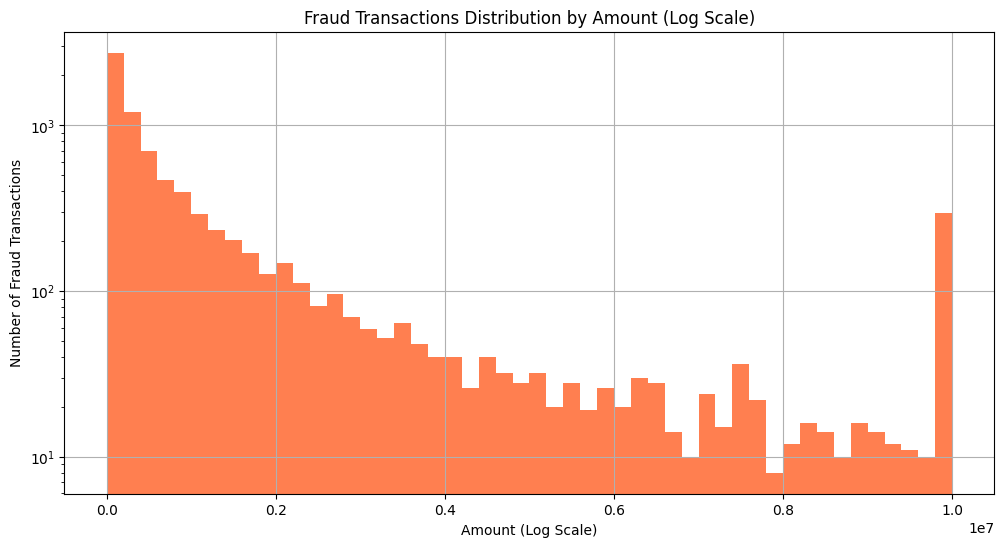

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Filter data where isFraud is 1
fraud_data = df[df['isFraud'] == 1]

# Plot the amount values on a logarithmic scale
plt.figure(figsize=(12, 6))
plt.hist(fraud_data['amount'], bins=50, color='coral', log=True)
plt.xlabel('Amount (Log Scale)')
plt.ylabel('Number of Fraud Transactions')
plt.title('Fraud Transactions Distribution by Amount (Log Scale)')
plt.grid(True)
plt.show()

In [4]:
###########Feature Engineering###########
df['MoneySpentSender'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df = df.drop(columns=['newbalanceOrig'])
df['MoneyReceiver'] = df['oldbalanceDest'] - df['newbalanceDest']
df = df.drop(columns=['newbalanceDest'])

<Axes: >

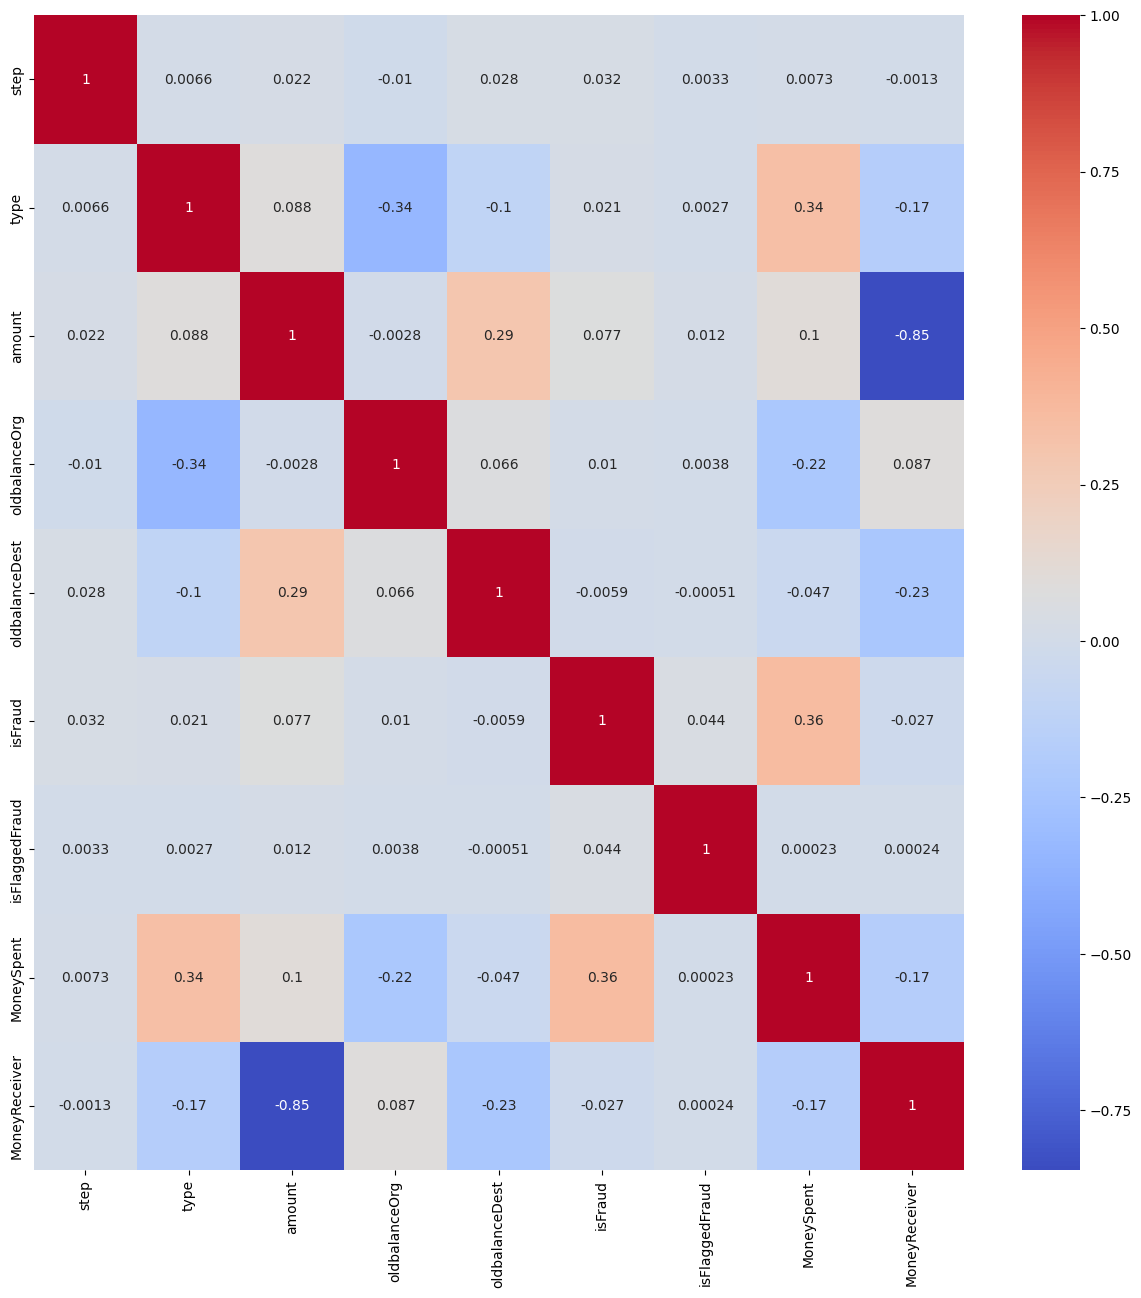

In [19]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr=numeric_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr ,annot=True,cmap='coolwarm')

In [25]:
corr_close = corr['isFraud']

corr_close = corr_close.abs().sort_values(ascending=False)

print('Correlation :')

print(corr_close)
 

Correlation :
isFraud          1.00
MoneySpent       0.36
amount           0.08
isFlaggedFraud   0.04
step             0.03
MoneyReceiver    0.03
nameDest         0.02
type             0.02
oldbalanceOrg    0.01
oldbalanceDest   0.01
nameOrig         0.00
Name: isFraud, dtype: float64


In [23]:
# viết function để tự độngđộng hóa
def correlation(corr, threshold):
    corr_pair = [] # Set of all the names of correlated columns
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold : 
                corr_pair.append((corr.columns[i], corr.columns[j], corr.iloc[i,j]))
    return corr_pair

In [24]:
corr = df.corr()
correlation(corr, 0.8)

[('MoneyReceiver', 'amount', np.float64(-0.8459636732021373))]

In [5]:
df = df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])

In [ ]:
#Training and Testing-----------------------------------------------------

In [6]:
df = pd.get_dummies(df, columns=['type'], dtype=int)


In [7]:
df.head()

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,MoneySpentSender,MoneyReceiver,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,0.0,0,9839.64,0.0,0,0,0,1,0
1,1,1864.28,21249.0,0.0,0,1864.28,0.0,0,0,0,1,0
2,1,181.00,181.0,0.0,1,181.00,0.0,0,0,0,0,1
3,1,181.00,181.0,21182.0,1,181.00,21182.0,0,1,0,0,0
4,1,11668.14,41554.0,0.0,0,11668.14,0.0,0,0,0,1,0


In [8]:
new_df = df.copy()

In [8]:
new_df.head()

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,MoneySpentSender,MoneyReceiver,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,0.0,0,9839.64,0.0,0,0,0,1,0
1,1,1864.28,21249.0,0.0,0,1864.28,0.0,0,0,0,1,0
2,1,181.00,181.0,0.0,1,181.00,0.0,0,0,0,0,1
3,1,181.00,181.0,21182.0,1,181.00,21182.0,0,1,0,0,0
4,1,11668.14,41554.0,0.0,0,11668.14,0.0,0,0,0,1,0


In [9]:
new_df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [14]:
# Get fraud and non-fraud data
fraud_data = df[df['isFraud'] == 1]
non_fraud_data = df[df['isFraud'] == 0]

print(f"Original fraud cases: {len(fraud_data)}")
print(f"Original non-fraud cases: {len(non_fraud_data)}")

# Keep only 20% of non-fraud data (remove 80%)
non_fraud_to_keep = int(len(non_fraud_data) * 0.2)  # Keep 20% of non-fraud cases
non_fraud_sample = non_fraud_data.sample(n=non_fraud_to_keep, random_state=42)

# Combine with all fraud data
df_reduced = pd.concat([fraud_data, non_fraud_sample], ignore_index=True)

# Shuffle the dataset
df_reduced = df_reduced.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Reduced non-fraud cases: {len(non_fraud_sample)}")
print(f"Final dataset size: {len(df_reduced)}")
print(f"New fraud distribution:")
print(df_reduced['isFraud'].value_counts())

Original fraud cases: 8213
Original non-fraud cases: 6354407
Reduced non-fraud cases: 1270881
Final dataset size: 1279094
New fraud distribution:
isFraud
0    1270881
1       8213
Name: count, dtype: int64


In [17]:
df_reduced.head()

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,MoneySpentSender,MoneyReceiver,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
924025,44,178080.36,0.00,279999.01,0,0.00,-178080.36,0,1,0,0,0
312007,304,171448.92,112930.00,5235987.01,0,112930.00,-171448.92,0,1,0,0,0
319085,274,11447.43,165967.39,0.00,0,11447.43,0.00,0,0,0,1,0
632270,188,224469.02,234.00,499090.85,0,-224469.02,224469.02,1,0,0,0,0
967541,709,129966.47,103698.00,0.00,0,103698.00,-129966.47,0,1,0,0,0


In [15]:
#######Reduced data split#######
df_reduced = df_reduced.sample(frac=1, random_state=42)
X=df_reduced.drop('isFraud',axis=1)
y=df_reduced['isFraud']
X, y = X.values, y.values
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
#########Original data split#######
# new_df = new_df.sample(frac=1, random_state=42)
# X=new_df.drop('isFraud',axis=1)
# y=new_df['isFraud']
# X, y = X.values, y.values
# x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [16]:
x_train.shape,x_val.shape,y_train.shape,y_val.shape


((1023275, 11), (255819, 11), (1023275,), (255819,))

In [18]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler=RobustScaler()

x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)

C:\Users\minh1\AppData\Local\Temp\ipykernel_6492\3571026708.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cv_results, labels=models.keys())


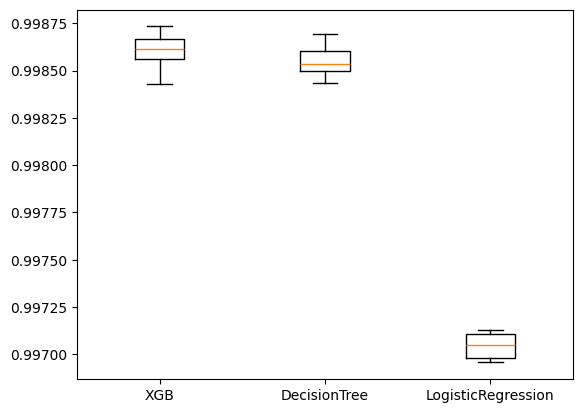

In [19]:
from sklearn.model_selection import cross_val_score, KFold
models = {"XGB": XGBClassifier(n_estimators=300,
                                max_depth=6,
                                learning_rate=0.1,
                                scale_pos_weight=10,  # Use if classes are imbalanced
                                objective='binary:logistic',
                                # eval_metric='auc',
                                n_jobs=-1,  # Use all CPU cores
                                random_state=42
                                ), 
          "DecisionTree": DecisionTreeClassifier(class_weight={0: 1, 1: 10}),
          'LogisticRegression':  LogisticRegression() }

# Store cross-validation results
cv_results = []
# Store trained models
trained_models = {}

for name, model in models.items():
    # Perform cross-validation
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_scores = cross_val_score(model, x_train, y_train, cv=kf)
    cv_results.append(cv_scores)
    
    # Train the model on full training data
    model.fit(x_train, y_train)
    trained_models[name] = model

plt.boxplot(cv_results, labels=models.keys())
plt.show()


🔍 Model: XGB
Confusion Matrix:
[[253904    290]
 [    79   1546]]


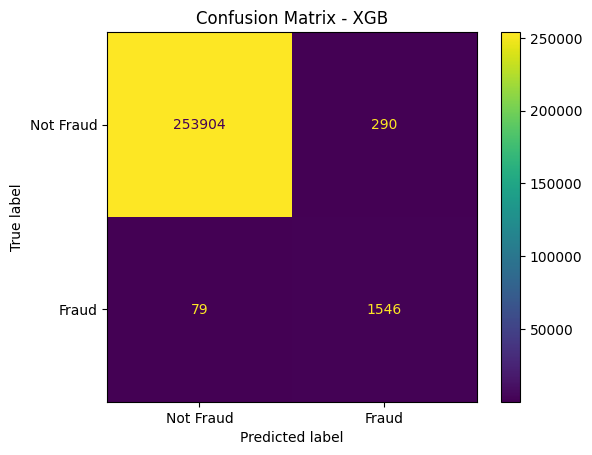

Accuracy: 0.9985575739096784
F1 Score: 0.8933834151979196
ROC AUC: 0.9994590709337084

🔍 Model: DecisionTree
Confusion Matrix:
[[254027    167]
 [   184   1441]]


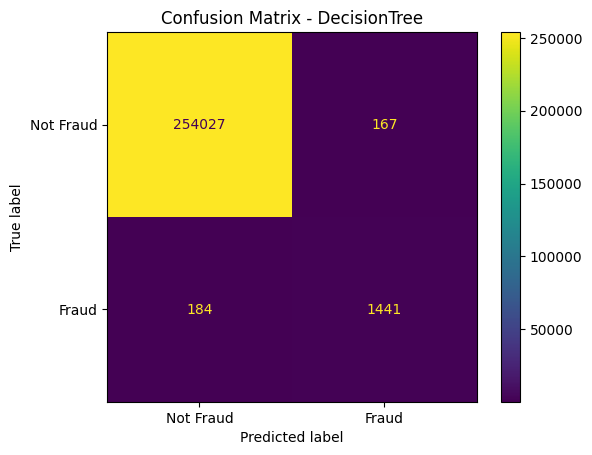

Accuracy: 0.9986279361579867
F1 Score: 0.891432106402722
ROC AUC: 0.9430561261205099

🔍 Model: LogisticRegression
Confusion Matrix:
[[254112     82]
 [   656    969]]


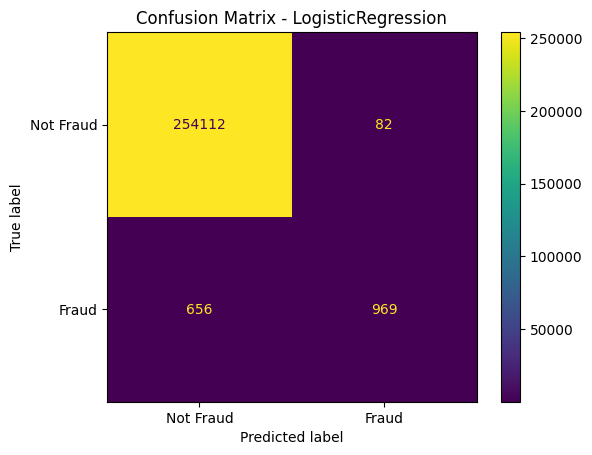

Accuracy: 0.9971151478193566
F1 Score: 0.7242152466367713
ROC AUC: 0.9900748997888349


In [20]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, model in trained_models.items():
    y_pred = model.predict(x_val)
    y_proba = model.predict_proba(x_val)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n🔍 Model: {name}")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_val, y_pred)
    print(cm)
    
    # Visualize confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
    disp.plot()
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("F1 Score:", f1_score(y_val, y_pred))

    if y_proba is not None:
        print("ROC AUC:", roc_auc_score(y_val, y_proba))
    else:
        print("ROC AUC: Not available (model")

In [ ]:
######################Apply SMOTE to training data####################

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({np.int64(0): 1016687, np.int64(1): 6588})
After SMOTE: Counter({np.int64(0): 1016687, np.int64(1): 1016687})


C:\Users\minh1\AppData\Local\Temp\ipykernel_6492\4151427113.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cv_results_smote, labels=models.keys())


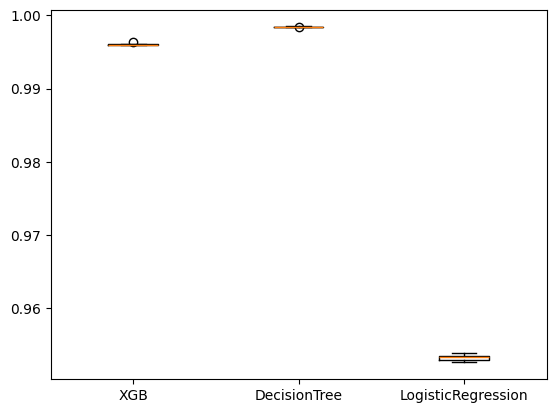

In [28]:
from sklearn.model_selection import cross_val_score, KFold
models = {"XGB": XGBClassifier(n_estimators=300,
                                max_depth=6,
                                learning_rate=0.1,
                                scale_pos_weight=10,  # Use if classes are imbalanced
                                objective='binary:logistic',
                                # eval_metric='auc',
                                n_jobs=-1,  # Use all CPU cores
                                random_state=42
                                ), 
          "DecisionTree": DecisionTreeClassifier(class_weight={0: 1, 1: 10}),
          'LogisticRegression':  LogisticRegression() }

# Store cross-validation results
cv_results_smote = []
# Store trained models
trained_models_smote = {}

for name, model in models.items():
    # Perform cross-validation
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=kf)
    cv_results_smote.append(cv_scores)
    
    # Train the model on full training data
    model.fit(X_train_resampled, y_train_resampled)
    trained_models_smote[name] = model

plt.boxplot(cv_results_smote, labels=models.keys())
plt.show()


🔍 Model: XGB
Confusion Matrix:
[[252242   1952]
 [     5   1620]]


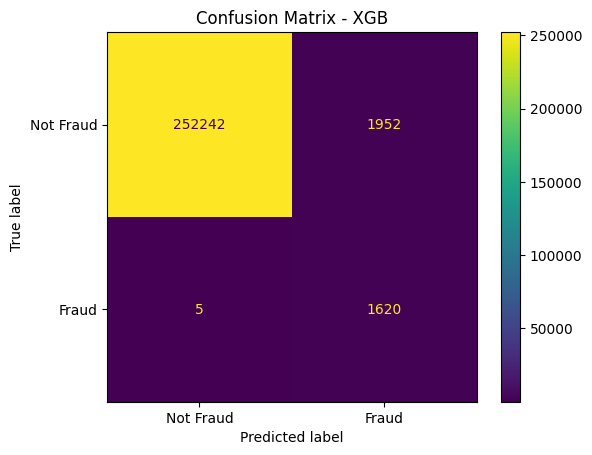

Accuracy: 0.9923500600033618
F1 Score: 0.6234365980373292
ROC AUC: 0.9993488546906331

🔍 Model: DecisionTree
Confusion Matrix:
[[253748    446]
 [    90   1535]]


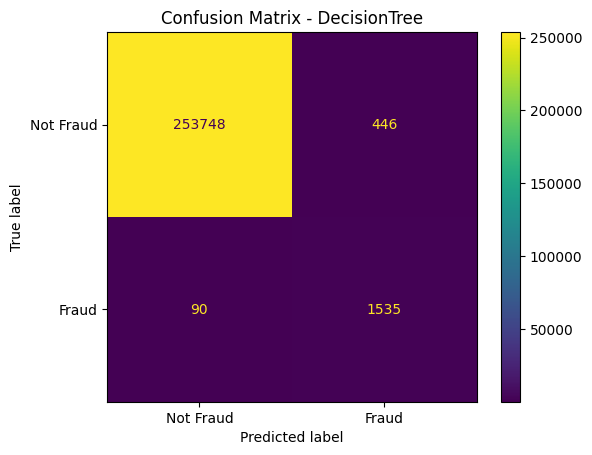

Accuracy: 0.9979047686059284
F1 Score: 0.8513588463671659
ROC AUC: 0.971430409602357

🔍 Model: LogisticRegression
Confusion Matrix:
[[241592  12602]
 [    76   1549]]


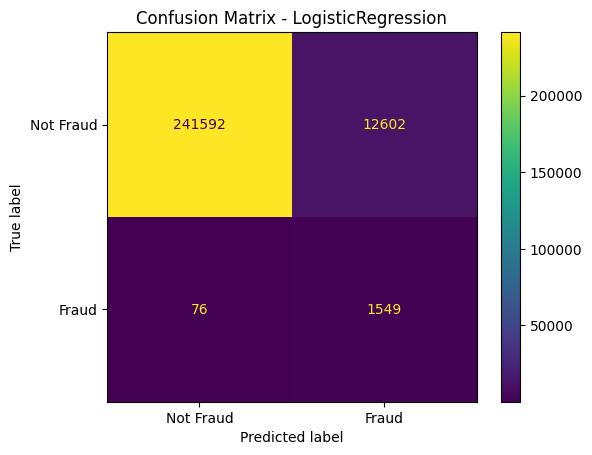

Accuracy: 0.950441523108135
F1 Score: 0.19637423935091278
ROC AUC: 0.9898384093070042


In [29]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, model in trained_models_smote.items():
    y_pred = model.predict(x_val)
    y_proba = model.predict_proba(x_val)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n🔍 Model: {name}")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_val, y_pred)
    print(cm)
    
    # Visualize confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
    disp.plot()
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("F1 Score:", f1_score(y_val, y_pred))

    if y_proba is not None:
        print("ROC AUC:", roc_auc_score(y_val, y_proba))
    else:
        print("ROC AUC: Not available (model")

In [ ]:
##################Devide into batches##################

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data into train/validation/test
X_train_batch, X_val_batch, y_train_batch, y_val_batch = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, stratify=y_train_resampled, random_state=42)

# Initialize model
xgb = XGBClassifier(n_estimators=300,
                                max_depth=6,
                                learning_rate=0.1,
                                scale_pos_weight=10,  # Use if classes are imbalanced
                                objective='binary:logistic',
                                # eval_metric='auc',
                                n_jobs=-1,  # Use all CPU cores
                                random_state=42
                                )

# Fit with eval set
xgb.fit(
    X_train_batch, y_train_batch,
    eval_set=[(X_train_batch, y_train_batch), (X_val_batch, y_val_batch)],
    verbose=True  # shows eval result every iteration
)

# Evaluate
y_pred = xgb.predict(x_val)
print(classification_report(y_val, y_pred))
cm = confusion_matrix(y_val, y_pred)
print(cm)


[0]	validation_0-logloss:0.76607	validation_1-logloss:0.76607
[1]	validation_0-logloss:0.63603	validation_1-logloss:0.63596
[2]	validation_0-logloss:0.54386	validation_1-logloss:0.54377
[3]	validation_0-logloss:0.47331	validation_1-logloss:0.47323
[4]	validation_0-logloss:0.41796	validation_1-logloss:0.41791
[5]	validation_0-logloss:0.37277	validation_1-logloss:0.37280
[6]	validation_0-logloss:0.33439	validation_1-logloss:0.33452
[7]	validation_0-logloss:0.30241	validation_1-logloss:0.30264
[8]	validation_0-logloss:0.27538	validation_1-logloss:0.27571
[9]	validation_0-logloss:0.25230	validation_1-logloss:0.25271
[10]	validation_0-logloss:0.23249	validation_1-logloss:0.23297
[11]	validation_0-logloss:0.21435	validation_1-logloss:0.21488
[12]	validation_0-logloss:0.19580	validation_1-logloss:0.19637
[13]	validation_0-logloss:0.18190	validation_1-logloss:0.18249
[14]	validation_0-logloss:0.16845	validation_1-logloss:0.16904
[15]	validation_0-logloss:0.15679	validation_1-logloss:0.15734
[1

In [ ]:
################Old version##################

In [15]:
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=10,  # Use if classes are imbalanced
    objective='binary:logistic',
    # eval_metric='auc',
    n_jobs=-1,  # Use all CPU cores
    random_state=42
)

# Fit the model
xgb_model.fit(x_train, y_train)
print("Confusion matrix :")
print(confusion_matrix(y_val,xgb_model.predict(x_val)))

print(classification_report(y_val, xgb_model.predict(x_val), target_names=['Not Fraud', 'Fraud']))

Confusion matrix :
[[1270484     365]
 [    166    1509]]
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270849
       Fraud       0.81      0.90      0.85      1675

    accuracy                           1.00   1272524
   macro avg       0.90      0.95      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



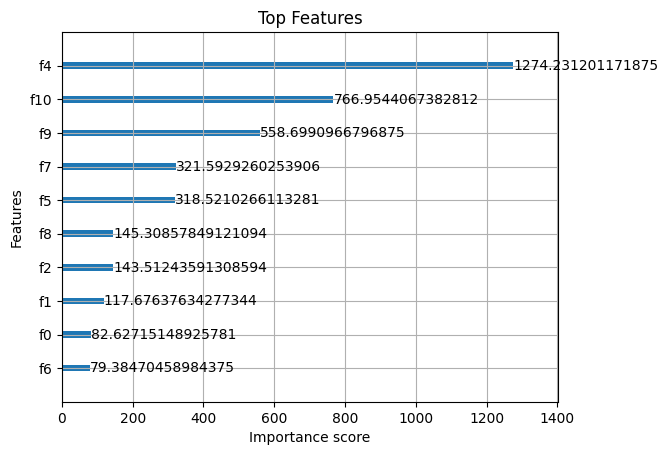

In [16]:
plot_importance(xgb_model, max_num_features=10, importance_type='gain', title='Top Features')
plt.show()

In [403]:
import lightgbm as lgb

# Set the scale_pos_weight based on imbalance

lgb_model = lgb.LGBMClassifier(
    n_estimators=400,
    max_depth=7,
    learning_rate=0.1,
    scale_pos_weight=10,  # <- handle imbalance
    random_state=42,
    n_jobs=-1
)
lgb_model.fit(x_train, y_train)
print(classification_report(y_val, lgb_model.predict(x_val), target_names=['Not Fraud', 'Fraud']))

[LightGBM] [Info] Number of positive: 6610, number of negative: 5083486
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2045
[LightGBM] [Info] Number of data points in the train set: 5090096, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001299 -> initscore=-6.645169
[LightGBM] [Info] Start training from score -6.645169
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

d:\Miniconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270921
       Fraud       0.37      0.83      0.51      1603

    accuracy                           1.00   1272524
   macro avg       0.69      0.91      0.76   1272524
weighted avg       1.00      1.00      1.00   1272524



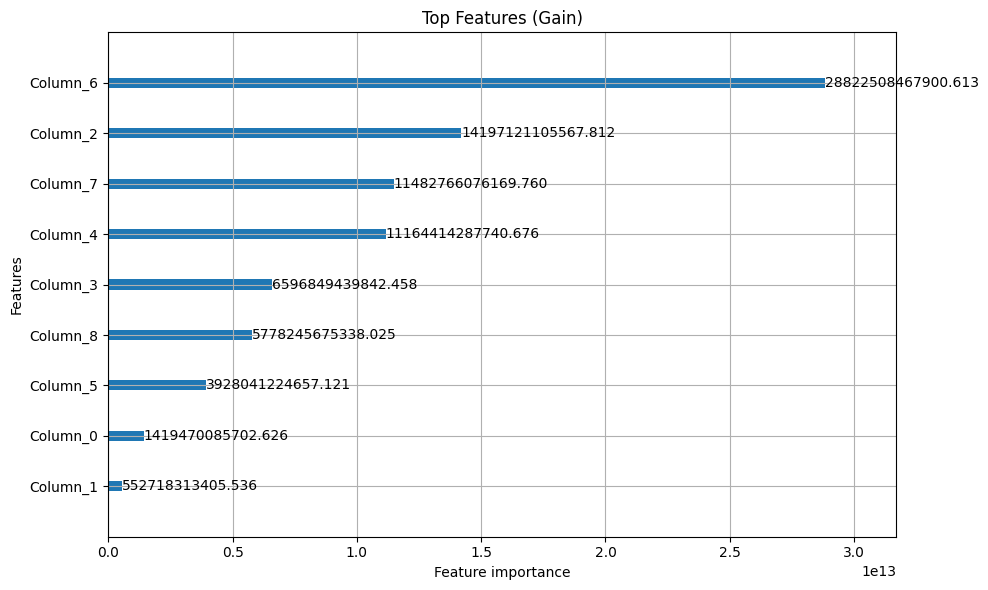

In [404]:
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='gain', figsize=(10,6))
plt.title("Top Features (Gain)")
plt.tight_layout()
plt.show()

In [18]:
dt=DecisionTreeClassifier(class_weight={0: 1, 1: 10})
dt.fit(x_train, y_train)
print("Confusion matrix :")
print(confusion_matrix(y_val,dt.predict(x_val)))

print(classification_report(y_val, dt.predict(x_val), target_names=['Not Fraud', 'Fraud']))


Confusion matrix :
[[1270623     226]
 [    276    1399]]
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270849
       Fraud       0.86      0.84      0.85      1675

    accuracy                           1.00   1272524
   macro avg       0.93      0.92      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
rf_model = RandomForestClassifier(n_estimators=100,class_weight={0: 1, 1: 10}, random_state=42)

rf_model.fit(x_train, y_train)
print("Confusion matrix :")
print(confusion_matrix(y_val,rf_model.predict(x_val)))

print(classification_report(y_val, rf_model.predict(x_val), target_names=['Not Fraud', 'Fraud']))


In [348]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_model.score(x_train, y_train)
print(classification_report(y_val, logistic_model.predict(x_val), target_names=['Not Fraud', 'Fraud']))

d:\Miniconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270921
       Fraud       0.77      0.44      0.56      1603

    accuracy                           1.00   1272524
   macro avg       0.89      0.72      0.78   1272524
weighted avg       1.00      1.00      1.00   1272524



In [231]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(x_train, y_train)
print(classification_report(y_val, rf.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270921
       Fraud       1.00      0.03      0.07      1603

    accuracy                           1.00   1272524
   macro avg       1.00      0.52      0.53   1272524
weighted avg       1.00      1.00      1.00   1272524



In [232]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
print(classification_report(y_val, gbc.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270921
       Fraud       1.00      0.03      0.05      1603

    accuracy                           1.00   1272524
   macro avg       1.00      0.51      0.53   1272524
weighted avg       1.00      1.00      1.00   1272524



In [234]:
from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight='balanced')
svc.fit(x_train, y_train)
print(classification_report(y_val, svc.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.94      0.97   1270921
       Fraud       0.02      0.90      0.04      1603

    accuracy                           0.94   1272524
   macro avg       0.51      0.92      0.50   1272524
weighted avg       1.00      0.94      0.97   1272524



In [28]:
# y_probs = gbc.predict_proba(x_val)[:, 1]  # probabilities for class '1' (fraud)
# y_probs = logistic_model.predict_proba(x_val)[:, 1]  # probabilities for class '1' (fraud)
y_probs = rf_model.predict_proba(x_val)[:, 1]  # probabilities for class '1' (fraud)
# y_probs = svc.decision_function(x_val)  # decision function values for SVC
# y_probs = xgb_model.predict_proba(x_val)[:, 1]   # decision function values for SVC


# Step 2: Apply your custom threshold (e.g., 0.9)
threshold = 0.22
y_pred_thresh = (y_probs > threshold).astype(int)

# Step 3: Evaluate the predictions
print(confusion_matrix(y_val, y_pred_thresh))
print(classification_report(y_val, y_pred_thresh, target_names=['Not Fraud', 'Fraud']))

[[1270752     152]
 [    202    1418]]
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270904
       Fraud       0.90      0.88      0.89      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
# from sklearn.metrics import precision_recall_curve, f1_score
# import matplotlib.pyplot as plt
# import numpy as np

# precision, recall, thresholds = precision_recall_curve(y_val, y_probs)
# f1 = 2 * (precision * recall) / (precision + recall + 1e-6)  # avoid division by zero

# best_idx = np.argmax(f1)
# best_threshold = thresholds[best_idx]
# print(f"🔧 Best threshold for max F1: {best_threshold:.4f}")

# y_pred_best = (y_probs > best_threshold).astype(int)

# from sklearn.metrics import classification_report, confusion_matrix

# print(confusion_matrix(y_val, y_pred_best))
# print(classification_report(y_val, y_pred_best, target_names=['Not Fraud', 'Fraud']))

🔧 Best threshold for max F1: 0.2900
[[1270819      85]
 [    244    1376]]
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270904
       Fraud       0.94      0.85      0.89      1620

    accuracy                           1.00   1272524
   macro avg       0.97      0.92      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
#DOWN SAMPLE----------------------------------------------------------------------------

In [351]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
3737323,278,0,"330,218.42",5144186,"20,866.00","351,084.42",523341,"452,419.57","122,201.15",0
264914,15,3,"11,647.08",868156,"30,370.00","18,722.92",1849210,0.00,0.00,0
85647,10,0,"152,264.21",2453021,"106,589.00","258,853.21",179836,"201,303.01","49,038.80",0
5899326,403,4,"1,551,760.63",4162339,0.00,0.00,167013,"3,198,359.45","4,750,120.08",0
2544263,206,0,"78,172.30",5740614,"2,921,331.58","2,999,503.88",27202,"415,821.90","337,649.60",0


In [352]:
frauds = train.query('isFraud == 1')
not_frauds = train.query('isFraud == 0')
not_frauds['isFraud'].value_counts(), frauds['isFraud'].value_counts()

(isFraud
 0    5083486
 Name: count, dtype: int64,
 isFraud
 1    6610
 Name: count, dtype: int64)

In [353]:
balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_df['isFraud'].value_counts()  

isFraud
1    6610
0    6610
Name: count, dtype: int64

In [354]:
balanced_df = balanced_df.sample(frac=1, random_state=1)
balanced_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6030109,473,1,"70,239.81",5918272,"70,239.81",0.00,125688,"255,444.42","325,684.23",1
2946481,230,1,"40,611.22",2029200,0.00,0.00,417752,0.00,"40,611.22",1
5562493,385,1,"627,088.33",2092694,"627,088.33",0.00,291499,"594,476.39","1,221,564.72",1
5670424,397,0,"23,365.30",4099370,"6,147,836.91","6,171,202.21",484051,"275,922.03","252,556.72",0
1646483,157,0,"190,814.84",2678385,"1,157,616.54","1,348,431.38",119749,"1,019,854.56","829,039.71",0
...,...,...,...,...,...,...,...,...,...,...
1509902,145,3,"12,722.88",674687,"97,227.45","84,504.57",2341956,0.00,0.00,0
4196843,305,4,"447,589.21",2064478,"447,589.21",0.00,475700,0.00,0.00,1
1030388,61,1,"475,368.94",6080550,"475,368.94",0.00,218503,"1,348,026.73","1,823,395.67",1
6281969,656,3,"9,601.30",4130713,"103,630.00","94,028.70",911879,0.00,0.00,0


In [ ]:
# balanced_df_np = balanced_df.to_numpy()

# # Compute sizes
# total_len = len(balanced_df_np)
# train_end = int(0.8 * total_len)
# val_end = int(0.9 * total_len)

# # Split the data
# train_np = balanced_df_np[:train_end]
# val_np = balanced_df_np[train_end:val_end]
# test_np = balanced_df_np[val_end:]

# # Separate features and labels
# x_train_b, y_train_b = train_np[:, :-1], train_np[:, -1]
# x_val_b, y_val_b = val_np[:, :-1], val_np[:, -1]
# x_test_b, y_test_b = test_np[:, :-1], test_np[:, -1]
# x_train_b.shape, y_train_b.shape, x_val_b.shape, y_val_b.shape, x_test_b.shape, y_test_b.shape

((13140, 9), (13140,), (1643, 9), (1643,), (1643, 9), (1643,))

In [355]:
balanced_df_np = balanced_df.to_numpy()

x_train_b, y_train_b = balanced_df_np[:, :-1], balanced_df_np[:, -1]


In [356]:
pd.Series(y_train_b).value_counts(), pd.Series(y_val).value_counts()

(1.00    6610
 0.00    6610
 Name: count, dtype: int64,
 0.00    1270921
 1.00       1603
 Name: count, dtype: int64)

In [357]:
logistic_model_b = LogisticRegression(max_iter=10000)
logistic_model_b.fit(x_train_b, y_train_b)
logistic_model_b.score(x_train_b, y_train_b)
print(classification_report(y_val, logistic_model_b.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.94      0.97   1270921
       Fraud       0.02      0.93      0.04      1603

    accuracy                           0.94   1272524
   macro avg       0.51      0.94      0.51   1272524
weighted avg       1.00      0.94      0.97   1272524



In [358]:
rf_b = RandomForestClassifier(n_estimators=200,max_depth=30, n_jobs=-1)
rf_b.fit(x_train_b, y_train_b)
print(classification_report(y_val, rf_b.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.99      0.99   1270921
       Fraud       0.08      1.00      0.15      1603

    accuracy                           0.99   1272524
   macro avg       0.54      0.99      0.57   1272524
weighted avg       1.00      0.99      0.99   1272524



In [359]:
gbc_b = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val, gbc_b.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.99   1270921
       Fraud       0.04      0.99      0.08      1603

    accuracy                           0.97   1272524
   macro avg       0.52      0.98      0.53   1272524
weighted avg       1.00      0.97      0.98   1272524



In [360]:
svc_b = LinearSVC(class_weight='balanced')
svc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val, svc_b.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.95      0.97   1270921
       Fraud       0.02      0.89      0.04      1603

    accuracy                           0.95   1272524
   macro avg       0.51      0.92      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



In [275]:
# y_probs = gbc_b.predict_proba(x_val)[:, 1]  # probabilities for class '1' (fraud)
# y_probs = logistic_model_b.predict_proba(x_val)[:, 1]  # probabilities for class '1' (fraud)
y_probs = rf_b.predict_proba(x_val)[:, 1]  # probabilities for class '1' (fraud)
# y_probs = svc_b.decision_function(x_val)  # decision function values for SVC

threshold = 0.98
# Step 2: Apply your custom threshold (e.g., 0.9)
y_pred_thresh = (y_probs > threshold).astype(int)

# Step 3: Evaluate the predictions
print(confusion_matrix(y_val, y_pred_thresh))
print(classification_report(y_val, y_pred_thresh, target_names=['Not Fraud', 'Fraud']))

[[1270741     180]
 [    334    1269]]
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270921
       Fraud       0.88      0.79      0.83      1603

    accuracy                           1.00   1272524
   macro avg       0.94      0.90      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



In [368]:
xgb_model_b = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    objective='binary:logistic',
    n_jobs=-1,  # Use all CPU cores
    random_state=42
)

# Fit the model
xgb_model_b.fit(x_train_b, y_train_b)

print(classification_report(y_val, xgb_model_b.predict(x_val), target_names=['Not Fraud', 'Fraud']))


              precision    recall  f1-score   support

   Not Fraud       1.00      0.99      0.99   1270921
       Fraud       0.09      1.00      0.16      1603

    accuracy                           0.99   1272524
   macro avg       0.54      0.99      0.58   1272524
weighted avg       1.00      0.99      0.99   1272524



In [ ]:
# from sklearn.metrics import precision_recall_curve, f1_score
# import matplotlib.pyplot as plt
# import numpy as np

# precision, recall, thresholds = precision_recall_curve(y_val, y_probs)
# f1 = 2 * (precision * recall) / (precision + recall + 1e-6)  # avoid division by zero

# best_idx = np.argmax(f1)
# best_threshold = thresholds[best_idx]
# print(f"🔧 Best threshold for max F1: {best_threshold:.4f}")

# y_pred_best = (y_probs > best_threshold).astype(int)

# from sklearn.metrics import classification_report, confusion_matrix

# print(confusion_matrix(y_val, y_pred_best))
# print(classification_report(y_val, y_pred_best, target_names=['Not Fraud', 'Fraud']))


🔧 Best threshold for max F1: 0.9900
[[1270858      63]
 [    456    1147]]
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270921
       Fraud       0.95      0.72      0.82      1603

    accuracy                           1.00   1272524
   macro avg       0.97      0.86      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------

In [306]:
dt= DecisionTreeClassifier(max_depth=5,class_weight={0: 1, 1: 10})
dt.fit(x_train,y_train)
print(classification_report(y_val, dt.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270921
       Fraud       0.95      0.68      0.79      1603

    accuracy                           1.00   1272524
   macro avg       0.97      0.84      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
rf_model = RandomForestClassifier(n_estimators=100,class_weight={0: 1, 1: 10}, random_state=42)
rf_model.fit(x_train, y_train)
print(classification_report(y_val, rf_model.predict(x_val), target_names=['Not Fraud', 'Fraud']))

In [313]:
y_probs = dt.predict_proba(x_val)[:, 1]  # probabilities for class '1' (fraud)

threshold = 0.9
# Step 2: Apply your custom threshold (e.g., 0.9)
y_pred_thresh = (y_probs > threshold).astype(int)

# Step 3: Evaluate the predictions
print(confusion_matrix(y_val, y_pred_thresh))
print(classification_report(y_val, y_pred_thresh, target_names=['Not Fraud', 'Fraud']))

[[1270863      58]
 [    512    1091]]
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270921
       Fraud       0.95      0.68      0.79      1603

    accuracy                           1.00   1272524
   macro avg       0.97      0.84      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524

